In [2]:
import pandas as pd

output_path = './Salary_Data_2.csv'

path = output_path
df = pd.read_csv(output_path)

# y = w*x + b
x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7


In [3]:
df["EducationLevel"] = df["EducationLevel"].map({"高中以下": 0, "大學": 1, "碩士以上": 2})
df.head(5)

,YearsExperience,EducationLevel,City,Salary
0,3.0,1,城市A,45.9
1,7.8,2,城市C,80.5
2,2.3,0,城市A,25.2
3,5.1,0,城市A,30.4
4,10.0,2,城市B,65.7


In [4]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(df[["City"]])
city_encoded = onehot_encoder.transform(df[["City"]]).toarray()
city_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [5]:
df[["CityA", "CityB", "CityC"]] = city_encoded
df.head(5)

,YearsExperience,EducationLevel,City,Salary,CityA,CityB,CityC
0,3.0,1,城市A,45.9,1.0,0.0,0.0
1,7.8,2,城市C,80.5,0.0,0.0,1.0
2,2.3,0,城市A,25.2,1.0,0.0,0.0
3,5.1,0,城市A,30.4,1.0,0.0,0.0
4,10.0,2,城市B,65.7,0.0,1.0,0.0


In [6]:
df = df.drop(["City", "CityC"], axis=1)
df.head(5)

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0


In [7]:
from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(df, random_state=777, train_size=0.8)

x = df[["YearsExperience", "EducationLevel", "CityA", "CityB"]]
y = df["Salary"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)

# to_numpy() 是 Pandas 物件的一部分，用於從 Pandas 數據結構（DataFrame 或 Series）轉換為 NumPy 陣列
# np.asarray 是numpy, 且不會複製一份；若改用np.asarray則會複製一份。
x_train = x_train.to_numpy()
y_train = y_train.to_numpy() 
x_test = x_test.to_numpy()

# or
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)


In [8]:
from sklearn.preprocessing import StandardScaler



### .fit()+.transform() or fit_transform
xscaler = StandardScaler().fit(x_train)
x_train = xscaler.transform(x_train)
x_test = xscaler.transform(x_test)

# seems y_train Normalization and Standardization is not necessary !
# y_train = y_train.reshape(-1, 1)
# yscaler = StandardScaler().fit(y_train)
# y_train = yscaler.transform(y_train)    
# y_train = y_train.flatten() 

### or fit_transform. Both okay, but .fit_transform has no sclaer
# x_train = StandardScaler().fit_transform(x_train)
# y_train = StandardScaler().fit_transform(y_train)    


In [9]:
# y_train[2]=20
print(y_train)


[76.9 56.3 50.1 40.7 65.7 42.9 55.6 25.2 32.  31.6 36.7 29.7 60.8 43.8
 24.9 80.5 45.9 60.2 70.9 26.5 65.9 48.3 38.5 62.4 68.4 41.6 70.3 58. ]


In [10]:
import numpy as np
w= np.array([1 , 2 , 3 , 4])
b=0

y_pred = (x_train*w).sum(axis=1) + b
((y_train-y_pred)**2).mean()

# if only .mean : 輸出各自的值，若採用.mean()會再將之全部平均

2763.6872940327153

In [11]:
def Pred_LR(x, w, b):
    return   (x*w).sum(axis=1) + b   
    
y_pred = Pred_LR(x_train, w, b)
print(y_pred)

def Cost_mse(y, y_pred):
    return   ((y - y_pred)**2).mean()  
cost = Cost_mse(y_train, y_pred)
print(cost)

[-2.01762841 -4.1094973  -4.16583588  0.28156596 11.86920342  0.50176269
 -4.23923479 -3.00432458 -1.90334096 -1.94004041  0.31826542 -2.01343932
 -4.29299457  0.02466979 -2.93092567 -1.8708306  -0.15882749 11.86920342
 11.86920342 -3.07772349  3.56745651 -4.3126337   0.42836378 -4.18289621
  3.64085542  0.06136924  3.86105214 -4.07279785]
2763.6872940327153


In [12]:
### 從3_gradient_descent.ipynb copy 過來改即可
def compute_cost(x, y, w, b):
  # y_pred = (x*w).sum(axis=1) + b      #多了.sum(axis=1), becos M W-variables
  y_pred = Pred_LR(x, w, b)
  cost = ((y - y_pred)**2).mean()
  return cost
    
w = np.array([0, 2, 2, 4])
b = 0
compute_cost(x_train, y_train, w, b)

2754.448577386707

In [13]:

### 從3_gradient_descent.ipynb copy 過來改即可

def compute_gradient(x, y, w, b):
  # y_pred = (x*w).sum(axis=1) + b      #多了.sum(axis=1), becos M W-variables
  y_pred = Pred_LR(x, w, b)
  b_gradient = (y_pred -y).mean()
  w_gradient = np.zeros(x_train.shape[1])    # define n zero tensor for w_gradient ; x_train.shape[1] : 4 input variables
  # print(w_gradient)

  for i in range(x_train.shape[1]):
    w_gradient[i] = (x_train[:,i]*(y_pred -y)).mean()    # Remeber to add [i]
    # print(i,w_gradient)
  return w_gradient, b_gradient
    
w = np.array([1, 2, 2, 4])
b = 1
compute_gradient(x_train, y_train, w, b)

(array([ -4.40794953, -12.49010815,   9.02730785,  -0.76495639]),
 -49.36785714285715)

In [14]:
w = np.array([1, 2, 2, 4])
b = 1
learning_rate = 0.001
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)

w = w - w_gradient*learning_rate
b = b - b_gradient*learning_rate

print(compute_cost(x_train, y_train, w, b))

2639.510480287998


In [15]:
### 從3_gradient_descent.ipynb copy 過來改即可，只需修改print ~w: {w} 與 w_gradient: {w_gradient},　

def gradient_descent1(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [16]:
w_init = np.array([1, 2, 2, 4])
b_init = 1
learning_rate = 1.0e-1
run_iter = 10000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent1(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

print(f"w_final {w_final} : b_final {b_final: .4e}")

Iteration     0 : Cost  2.1350e+03, w: [1.44079495 3.24901082 1.09726921 4.07649564], b:  5.94e+00, w_gradient: [ -4.40794953 -12.49010815   9.02730785  -0.76495639], b_gradient: -4.94e+01
Iteration  1000 : Cost  1.6844e+01, w: [ 5.21250578 13.89426798 -1.24660828 -3.28101927], b:  5.04e+01, w_gradient: [-4.29814914e-15 -8.34253301e-15 -1.90323947e-16 -2.04994751e-15], b_gradient: -3.16e-14
Iteration  2000 : Cost  1.6844e+01, w: [ 5.21250578 13.89426798 -1.24660828 -3.28101927], b:  5.04e+01, w_gradient: [-4.29814914e-15 -8.34253301e-15 -1.90323947e-16 -2.04994751e-15], b_gradient: -3.16e-14
Iteration  3000 : Cost  1.6844e+01, w: [ 5.21250578 13.89426798 -1.24660828 -3.28101927], b:  5.04e+01, w_gradient: [-4.29814914e-15 -8.34253301e-15 -1.90323947e-16 -2.04994751e-15], b_gradient: -3.16e-14
Iteration  4000 : Cost  1.6844e+01, w: [ 5.21250578 13.89426798 -1.24660828 -3.28101927], b:  5.04e+01, w_gradient: [-4.29814914e-15 -8.34253301e-15 -1.90323947e-16 -2.04994751e-15], b_gradient: -

In [17]:
# y_pred = (w_final*x_test).sum(axis=1) + b_final
y_pred = Pred_LR(x_test, w_final, b_final)

pd.DataFrame({
    "y_pred": y_pred,
    "y_test": y_test
})

,y_pred,y_test
22,65.600000,63.6
12,70.851774,84.2
9,23.183792,28.1
3,28.348787,30.4
21,71.616958,78.3
16,66.993647,72.7
33,54.398785,45.2
11,44.036591,48.3


In [ ]:
# copy from 2_Cost_function.ipynb

def plot_scatter(x, y):
  import matplotlib.pyplot as plt
  plt.plot(range(0,80), range(0,80), color="blue")
  plt.scatter(x, y, marker="x", color="red")
  plt.title("Real vs Pred")
  plt.xlabel("Real")
  plt.ylabel("Pred")
  # plt.xlim([-100, 101])
  # plt.ylim([-60, 140])
  # plt.legend()
  plt.show()

plot_scatter(y_test, y_pred)


## Fitting Data  with sklearn

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
sk_y_pred = regr.predict(x_test)

show = pd.DataFrame({
    "y_pred": sk_y_pred,
    "y_test": y_test
})


In [23]:
show

,y_pred,y_test
22,65.600000,63.6
12,70.851774,84.2
9,23.183792,28.1
3,28.348787,30.4
21,71.616958,78.3
16,66.993647,72.7
33,54.398785,45.2
11,44.036591,48.3


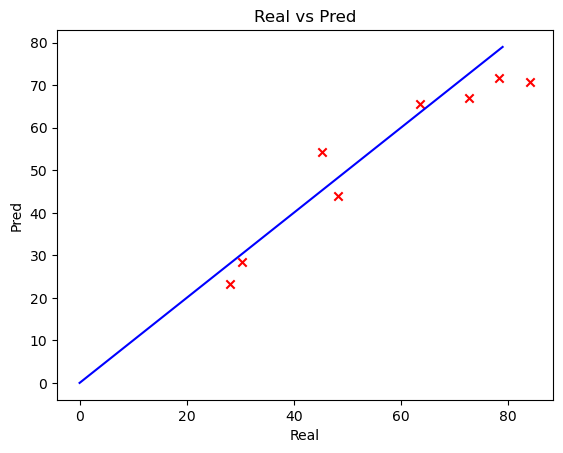

In [31]:
# copy from 2_Cost_function.ipynb

def plot_scatter(x, y):
  import matplotlib.pyplot as plt
  plt.plot(range(0,80), range(0,80), color="blue")
  plt.scatter(x, y, marker="x", color="red")
  plt.title("Real vs Pred")
  plt.xlabel("Real")
  plt.ylabel("Pred")
  # plt.xlim([-100, 101])
  # plt.ylim([-60, 140])
  # plt.legend()
  plt.show()

plot_scatter(y_test, sk_y_pred)
